### Restaurant Reviews - SentiMent Analysis - NLP 

In [1]:
#importing Libraries
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import display
pd.options.display.max_columns=None

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
# data loading
reviews=pd.read_csv("Restaurant_Reviews.tsv",sep='\t')
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
reviews.shape

(1000, 2)

In [12]:
# No.of null values in the df
reviews.isnull().sum()

Review    0
Liked     0
dtype: int64

## Data Cleaning :
- We will first remove all the punctuation marks
- Then we will make all the reviews to lower case
- Then tokenize words from the document and lemmatizing it
- Then remove all the words which are less than 2 characters.
- And then we are storing it in the list words and clean sentences in sentence list.

In [17]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
# creating customized stop words
from string import punctuation
stp_wrds=stopwords.words('english')

import re
from nltk.tokenize import word_tokenize
words=[]
sentence=[]
for i in reviews['Review']:
    
    #word = reviews.review.apply(lambda x : contractions_to_replace(x))
    word = re.sub("[^a-zA-Z]"," ",i)                                 # here we are removing the punctuations
    word = word.lower()                                             # making all the words to lower case lower
    word = word_tokenize(word)                                      # tokenising words from sentences
    
    
    # here we are removing all the stopwords and words of len less than 2
    lem=WordNetLemmatizer()
    w=[]
    for j in word :
        if j not in set(stp_wrds) :
            w.append(lem.lemmatize(j)) # Here we are lemmatizing the words so as to get meaningful words with least alphabets.
            
    # here we are creating sentences from those leammatised words
    ls=[]
    for k in w:
        if len(k)>2:
            ls.append(k)
            words.append(k)   
    sentence.append(" ".join(ls))

In [19]:
words

['wow',
 'loved',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommendation',
 'loved',
 'selection',
 'menu',
 'great',
 'price',
 'getting',
 'angry',
 'want',
 'damn',
 'pho',
 'honeslty',
 'taste',
 'fresh',
 'potato',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'fry',
 'great',
 'great',
 'touch',
 'service',
 'prompt',
 'would',
 'back',
 'cashier',
 'care',
 'ever',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced',
 'tried',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberry',
 'mmmm',
 'disgusted',
 'pretty',
 'sure',
 'human',
 'hair',
 'shocked',
 'sign',
 'indicate',
 'cash',
 'highly',
 'recommended',
 'waitress',
 'little',
 'slow',
 'service',
 'place',
 'worth',
 'time',
 'let',
 'alone',
 'vega',
 'like',
 'burrittos',
 'blah',
 'food',
 'amazing',
 'service',
 'also',
 'cute',
 'could',
 'care',
 'interior',
 'beautiful',
 'performed'

In [20]:
len(words)

5396

In [21]:
sentence

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would back',
 'cashier care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amazing',
 'service also cute',
 'could care interior beautiful',
 'performed',
 'right red velvet cake ohhh stuff good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'worst salmon sashimi',
 'also combo like burger fry 

In [22]:
len(sentence)

1000

In [23]:
# Adding clean_reviews to main data set
reviews['clean_reviews']=sentence

In [24]:
reviews

,Review,Liked,clean_reviews
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall impressed would back
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think ninja sus...


### Creating word Cloud with clean reviews:¶ 

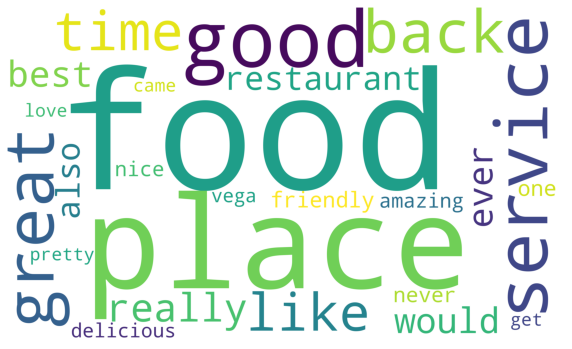

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Creating a single big_string which will be used for generating the wordcloud
single_corpus=" ".join(words)

# Creating wordcloud
word_cloud=WordCloud(stopwords=stp_wrds, width=1000, height=600, scale=3, background_color='white', \
                    max_words=25).generate(single_corpus)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(word_cloud);

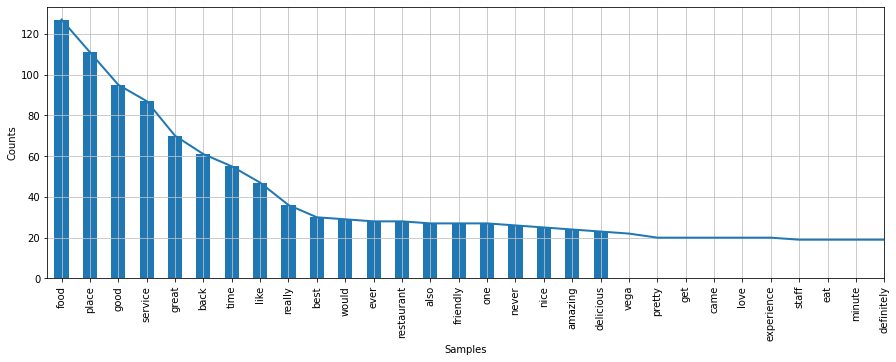

In [35]:
# Creating df and then checking frequency of each word
import numpy as np
df=pd.DataFrame({"words":words})
x=df['words'].value_counts().head(20)

# Plotting the frequency count of the most used words
plt.figure(figsize=(15,5))
x.plot(kind='bar');

# Counting the frequency of each word and showing the top 30 words
fdist=nltk.FreqDist(words)
fdist.plot(30, cumulative=False);

## n-gram analysis:

### Bag Of Words Matrix  (Document Term Matrix):
   - Creating a dataframe for further analysis
   - Here we have created a bi-gram dataframe for analysis
   - Each column represents the unique bi-gram of words used in sentences.
   - Each row index represents the sentence number.

In [37]:
# Creating Bag of words matrix using countvectorizer
# This is for the top 25 features, with highest no.of occurrences

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=25, ngram_range=(2,2))
X=cv.fit_transform(sentence).toarray()
X.shape

(1000, 25)

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

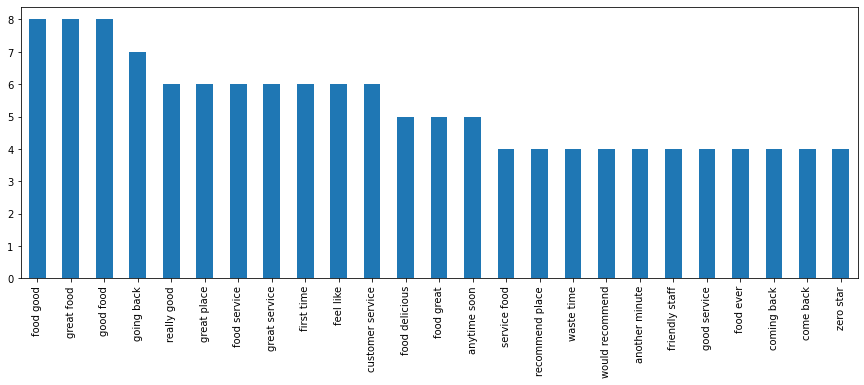

In [40]:
# Creating words with bi-gram of words used in the corpus
review_BOW=pd.DataFrame(X,columns=cv.get_feature_names())

# Plotting the frequency count of the top 25 bi-gram words from corpus
plt.figure(figsize=(15,5))
review_BOW.sum().sort_values(ascending=False).plot(kind='bar');


In [47]:
# DataFrame with clean review text
reviews

,Review,Liked,clean_reviews
0,Wow... Loved this place.,1,wow loved place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall impressed would back
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think ninja sus...


https://github.com/cjhutto/vaderSentiment

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

NOTE: The compound score is the one most commonly used for sentiment analysis by most researchers, including the authors.

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664


VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

https://blog.quantinsti.com/vader-sentiment/

## Valence Aware Dictionary and Sentiment Reasoner (VADER):
- It is a lexicon and rule-based sentiment analysis tool that is very highly collaborative with sentiments expressed in social media along with hashtags and other slangs.
- It also takes single ! or double !! into account before calculating the score of the sentiment for a document.
- Gives output in 4 score parameter with pos, neg, neu and compound score in a dictionary.
- This can be used in order to categorise the document into 1 of the three classes having the higher score
- These score can also be used to bin score values and try to under stand then try to understand the things which are good , bad or neutral about the product for EDA. 

In [42]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91938\AppData\Roaming\nltk_data...


True

In [49]:
# we are loading the vader lexicon dictionary and applying it on a review for example
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

print(" Positive Review:")
review_num1=0
reviews['Review'][review_num1]
analyser.polarity_scores(reviews['Review'][review_num1])

print(" Negative Review:")
review_num2=995
reviews['Review'][review_num2]
analyser.polarity_scores(reviews['Review'][review_num2])

 Positive Review:


'Wow... Loved this place.'

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

 Negative Review:


'I think food should have flavor and texture and both were lacking.'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [52]:
# Creating a list of compound score on each document of the review
c_score=[]
for i in reviews['Review']:
    c_score.append(analyser.polarity_scores(i)['compound'])
    
# Adding the compound score as a column
reviews['compound_score']=c_score
reviews.head()

,Review,Liked,clean_reviews,compound_score
0,Wow... Loved this place.,1,wow loved place,0.5994
1,Crust is not good.,0,crust good,-0.3412
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,-0.5574
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,0.6908
4,The selection on the menu was great and so wer...,1,selection menu great price,0.6249


## Defining Score range for Binning: 

    - -1 to <=0 : Negative
    - >0 to <=0.5 : Neutral
    - >0.5 : Positive

In [53]:
print("Minimum Score:", reviews['compound_score'].min())
print("Maximum Score:", reviews['compound_score'].max())

Minimum Score: -0.8637
Maximum Score: 0.9524


In [55]:
# Checking the reviews based on score bins
reviews[reviews['compound_score']<=0]
reviews[(reviews['compound_score']>0) & (reviews['compound_score']<0.5)]
reviews[reviews['compound_score']>0]

,Review,Liked,clean_reviews,compound_score
1,Crust is not good.,0,crust good,-0.3412
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,-0.5574
5,Now I am getting angry and I want my damn pho.,0,getting angry want damn pho,-0.6908
6,Honeslty it didn't taste THAT fresh.),0,honeslty taste fresh,0.0000
10,Service was very prompt.,1,service prompt,0.0000
...,...,...,...,...
994,I can't tell you how disappointed I was.,0,tell disappointed,-0.4767
995,I think food should have flavor and texture an...,0,think food flavor texture lacking,0.0000
996,Appetite instantly gone.,0,appetite instantly gone,0.0000
997,Overall I was not impressed and would not go b...,0,overall impressed would back,-0.3724


,Review,Liked,clean_reviews,compound_score
12,The cashier had no care what so ever on what I...,0,cashier care ever say still ended wayyy overpr...,0.2500
14,I was disgusted because I was pretty sure that...,0,disgusted pretty sure human hair,0.2732
16,Highly recommended.,1,highly recommended,0.2716
22,Service is also cute.,1,service also cute,0.4588
30,"Also there are combos like a burger, fries, an...",1,also combo like burger fry beer decent deal,0.3612
...,...,...,...,...
965,It's NOT hard to make a decent hamburger.,0,hard make decent hamburger,0.0762
968,We've have gotten a much better service from t...,0,gotten much better service pizza place next do...,0.4404
980,I have been to very few places to eat that und...,0,place eat circumstance would ever return top list,0.3970
983,It sure does beat the nachos at the movies but...,0,sure beat nacho movie would expect little bit ...,0.1655


,Review,Liked,clean_reviews,compound_score
0,Wow... Loved this place.,1,wow loved place,0.5994
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,0.6908
4,The selection on the menu was great and so wer...,1,selection menu great price,0.6249
7,The potatoes were like rubber and you could te...,0,potato like rubber could tell made ahead time ...,0.5719
8,The fries were great too.,1,fry great,0.6249
...,...,...,...,...
968,We've have gotten a much better service from t...,0,gotten much better service pizza place next do...,0.4404
980,I have been to very few places to eat that und...,0,place eat circumstance would ever return top list,0.3970
983,It sure does beat the nachos at the movies but...,0,sure beat nacho movie would expect little bit ...,0.1655
988,It really is impressive that the place hasn't ...,0,really impressive place closed,0.5542


In [56]:
# Binning the revies into 3 classes
bins=[-1,0,0.5,1]
names=['negative','neutral','positive']
reviews['vader_sentiment']=pd.cut(reviews['compound_score'],bins,labels=names,right=True, include_lowest=False)

In [57]:
reviews

,Review,Liked,clean_reviews,compound_score,vader_sentiment
0,Wow... Loved this place.,1,wow loved place,0.5994,positive
1,Crust is not good.,0,crust good,-0.3412,negative
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,-0.5574,negative
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...,0.6908,positive
4,The selection on the menu was great and so wer...,1,selection menu great price,0.6249,positive
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor texture lacking,0.0000,negative
996,Appetite instantly gone.,0,appetite instantly gone,0.0000,negative
997,Overall I was not impressed and would not go b...,0,overall impressed would back,-0.3724,negative
998,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think ninja sus...,0.0000,negative


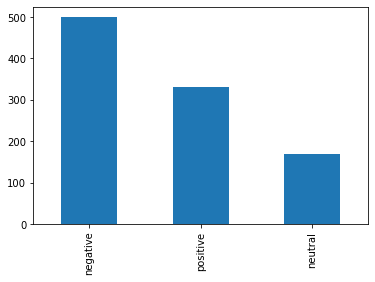

In [59]:
# from here we can see the reviews are mostly negative
reviews['vader_sentiment'].value_counts().plot(kind='bar');

In [60]:
reviews = reviews.reset_index(drop=True)

orig_reviews = pd.read_csv("Restaurant_Reviews.tsv",sep='\t')
orig_reviews.shape

(1000, 2)

In [61]:
orig_reviews

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [62]:
reviews_sentiment=pd.concat([orig_reviews,reviews['vader_sentiment']],axis=1)
reviews_sentiment.shape

reviews_sentiment.to_csv('Restaurant_Reviews_Sample_With_Sentiment_Label.tsv',index=False)

(1000, 3)

In [64]:
food_dict={}
for rev in range(0,1000):
    if 'food' in reviews['Review'][rev].lower():
        food_dict[reviews['Review'][rev].lower()]=reviews['vader_sentiment'][rev]
        
        #print (reviews_sentiment.loc[rev]["Review"].lower(), reviews_sentiment.loc[rev]["vader_sentiment"])
        
food_dict.items()

food_df=pd.DataFrame([{'Review':key, 'Sentiment':value} for key,value in food_dict.items()])
food_df.shape

food_df

dict_items([('the food, amazing.', 'positive'), ('took an hour to get our food only 4 tables in restaurant my food was luke warm, our sever was running around like he was totally overwhelmed.', 'positive'), ('seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere.', 'positive'), ("it's too bad the food is so damn generic.", 'negative'), ("they have horrible attitudes towards customers, and talk down to each one when customers don't enjoy their food.", 'negative'), ('loved it...friendly servers, great food, wonderful and imaginative menu.', 'positive'), ('not much seafood and like 5 strings of pasta at the bottom.', 'neutral'), ('great food and service, huge portions and they give a military discount.', 'positive'), ('we got the food and apparently they have never heard of salt and the batter on the fish was chewy.', 'negative'), ('there is so much good food in vegas that i feel cheated for wasting an eating opportunity by goin

(126, 2)

,Review,Sentiment
0,"the food, amazing.",positive
1,took an hour to get our food only 4 tables in ...,positive
2,seems like a good quick place to grab a bite o...,positive
3,it's too bad the food is so damn generic.,negative
4,they have horrible attitudes towards customers...,negative
...,...,...
121,i kept looking at the time and it had soon bec...,negative
122,food was below average.,negative
123,the refried beans that came with my meal were ...,negative
124,the presentation of the food was awful.,negative


In [65]:
food_df['Sentiment'].value_counts()

negative    58
positive    45
neutral     23
Name: Sentiment, dtype: int64

## Next steps:

1. Generate Insights on segregated data, Eg. to see what are the things which are good or gives the positive feedbacks in the Positive class reviews etc.
2. Use word embedding technique like Document term matrix, TF-IDF etc to transfrom the data.
3. Build a Classification model using transformed data.

## Word embedding techniques:
    - Document term matrix
    - TF-IDF
    - Word2Vec

In [69]:
# DTM matrix using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=25,ngram_range=(2,2))
X=cv.fit_transform(sentence).toarray()
X.shape

reviews.BOW=pd.DataFrame(X,columns=cv.get_feature_names())
reviews.BOW

(1000, 25)

,another minute,anytime soon,come back,coming back,customer service,feel like,first time,food delicious,food ever,food good,food great,food service,friendly staff,going back,good food,good service,great food,great place,great service,really good,recommend place,service food,waste time,would recommend,zero star
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Creating TF-IDF matrix

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=800,ngram_range=(2,2)) 
# Here Bigram is used. But if we use (1,3) then all Unique Uni,Bi & Trigrams will be generated
Y=tf.fit_transform(sentence).toarray()
Y.shape

# Creating a dataframe and adding the target variable to the data frame
reviews_TF=pd.DataFrame(Y,columns=tf.get_feature_names())
reviews_TF['vader_sentiment']=reviews['vader_sentiment']
reviews_TF

(1000, 800)

,absolutely amazing,also taste,always great,always hit,another minute,another said,anytime soon,around like,atmosphere fun,authentic thai,average best,avoid place,awesome service,bachi burger,back anytime,back every,bad food,bar food,beef sandwich,beer selection,best breakfast,best place,brick oven,bring check,burger good,came back,chicken tender,clean food,clean friendly,come back,coming back,crab leg,customer service,definitely back,definitely recommend,definitely worth,deserves star,dish delicious,dish quite,double cheeseburger,ever back,ever eaten,ever tasted,every time,everything fresh,everything menu,excellent service,extremely slow,family restaurant,fantastic service,feel like,felt like,fine dining,first time,first vega,food amazing,food arrived,food average,food bad,food came,food delicious,food ever,food good,food great,food quality,food really,food service,food terrible,food vega,found place,friendly helpful,friendly staff,gave star,generous portion,get food,give star,give try,give zero,going back,good beer,good food,good pizza,good price,good selection,good service,good thing,good though,good way,got food,got home,great atmosphere,great experience,great food,great place,great service,great side,great time,greek dressing,greeted seated,heart attack,high quality,highly recommend,hit spot,home made,hope place,hot dog,ice cold,ice cream,lacked flavor,last night,last time,like place,little slow,lobster bisque,love place,loved place,made feel,made house,many people,many place,many restaurant,many time,many unexperienced,many word,margarita way,maria server,market sewer,marrow added,martini ever,mary coming,massive meatloaf,may bank,may make,may part,may say,may stayed,maybe cold,maybe vegetarian,maybe went,mayo well,meal another,meal awesome,meal coconut,meal complain,meal contain,meal dried,meal either,meal get,meal wienerschnitzel,mean really,mean want,meat choose,meat ever,meat plate,meat pretty,meat ratio,meat thumb,meat totally,meat wow,meatloaf sandwich,mediocre best,mediocre food,mediocre imagine,mediterranean chicken,medium well,meet expectation,mein good,mellow mushroom,melt mouth,melt tasty,melted styrofoam,memory pneumatic,mention combination,menu always,menu beautiful,menu best,menu dinner,menu diverse,menu great,menu handed,menu much,menu order,menu provides,menu suggestion,menu terrific,menu waitress,menu worth,mesquite flavor,mess steak,metro area,mexican food,mexican street,mid lunch,middle day,might last,mile brushfire,military discount,milkshake nothing,min get,min pancake,min passed,mind making,minute acknowledged,minute get,much better,much good,much rather,multi grain,multiple time,mushroom yukon,music friday,music playing,music soundtrack,mussel cooked,must get,must hit,must night,must sitting,must stop,nan chicken,nargile think,nasty avoided,nay transcendant,nearly ten,neat bathroom,need complete,need made,need pack,need placed,need quit,need try,needed salt,needed water,needle say,neighborhood disappointed,neighborhood gem,neither burger,never anything,never back,never bland,never ever,never treated,never wait,new dish,new fav,new management,new restaurant,new spot,next door,next found,next pretty,next table,next time,next trip,nice ambiance,nice atmosphere,nice attentive,nice bar,nice blanket,nice char,nice checked,nice clean,nothing special,old super,old way,older crowd,omelet die,omg felt,omg food,one asking,one authentic,one best,one better,one bit,one bite,one customer,one edinburgh,one even,one gyro,one make,one nice,one note,one people,one philadelphia,one place,one point,one simply,one star,one table,onion ring,opened sandwich,operation website,opinion best,opportunity going,opportunity today,opposed cramming,option breakfast,option choose,option kiddos,order accordingly,order another,order arrived,order correct,order dessert,order disappointed,order like,order sad,order two,order vegetarian,order way,order yummy,ordered albondigas,ordered appetizer,ordered big,ordered burger,ordered double

In [72]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [75]:
# Creating Word2Vec Matrix

import gensim
g_model="GoogleNews-vectors-negative300.bin.gz"
embedded=gensim.models.keyedvectors.load_word2vec_format(g_model,binary=True)

final_w2v=pd.DataFrame()

for i in reviews.clean_reviews[:400]:
    temp=pd.DataFrame()
    words=i.split(' ')
    for j in words:
        try:
            w2v=embedded[j]
            temp=temp.append(pd.Series(w2v), ignore_index=True)
        except:
            pass
        sent_mean=temp.mean()
        final_w2v=final_w2v.append(pd.Series(sent_mean),ignore_index=True)
        
# Adding the target variable to our word2vec matrix/DataFrame
final_w2v['vader_sentiment']=reviews.vader_sentiment
final_w2v

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,vader_sentiment
0,0.125000,0.018066,0.057617,0.002274,-0.064453,-0.050781,0.034424,-0.171875,0.083008,0.232422,-0.211914,-0.343750,0.031494,0.059326,-0.017700,0.190430,0.245117,0.067871,0.134766,-0.162109,-0.007202,0.128906,0.185547,-0.032959,-0.015503,-0.038818,0.083984,-0.001427,0.110352,-0.129883,-0.220703,0.189453,-0.082520,0.052490,-0.003708,-0.239258,0.031128,0.263672,0.005920,0.208008,0.135742,-0.115234,0.326172,0.219727,0.123047,-0.065918,0.014465,-0.099121,-0.078613,0.194336,-0.120605,0.263672,-0.128906,0.214844,-0.028198,0.071289,0.028198,-0.064941,0.188477,-0.236328,-0.055664,-0.047852,0.004517,-0.060791,0.009521,-0.243164,-0.052979,0.008606,-0.198242,0.227539,0.012146,0.032715,0.102539,0.154297,-0.146484,-0.038574,-0.067871,0.072266,0.015198,0.082031,-0.098145,-0.084473,-0.201172,0.132812,-0.221680,-0.057129,-0.267578,0.137695,0.016724,-0.086426,-0.080566,0.153320,-0.380859,0.031128,-0.124512,-0.140625,-0.077637,0.279297,-0.015991,-0.067383,-0.257812,-0.013489,0.208984,-0.084961,-0.022461,0.228516,0.057373,-0.069824,0.116699,-0.263672,-0.083984,0.186523,0.085449,0.094238,0.490234,-0.232422,-0.132812,-0.084473,-0.180664,-0.351562,-0.001587,0.058105,0.040771,-0.011353,0.380859,0.036621,-0.092285,0.036377,0.048096,0.095215,-0.251953,0.091309,0.102051,0.228516,0.182617,0.208984,-0.009644,0.104980,-0.050293,0.029785,0.113281,-0.225586,-0.088379,0.078125,-0.071289,0.122559,0.152344,-0.189453,0.020752,-0.127930,-0.121582,0.137695,-0.043457,0.371094,-0.294922,-0.077148,-0.070801,0.146484,-0.283203,-0.150391,0.013611,0.028931,-0.093750,0.058350,0.072754,-0.265625,0.289062,-0.218750,-0.057373,0.075684,-0.388672,0.024536,-0.023193,0.090820,-0.074219,0.151367,0.231445,-0.158203,0.020142,-0.209961,-0.076660,-0.047607,0.209961,0.102539,-0.058838,-0.152344,-0.209961,-0.057617,-0.171875,-0.353516,-0.045410,-0.087402,0.239258,-0.125977,-0.115723,0.267578,0.219727,-0.093262,-0.224609,-0.203125,-0.004791,0.147461,-0.166016,-0.070801,-0.051025,0.125977,-0.061035,-0.070312,-0.087891,0.353516,0.226562,0.145508,-0.094238,-0.277344,-0.243164,-0.079590,0.181641,0.094238,0.034912,-0.060303,-0.105469,0.417969,0.037842,0.128906,0.095215,-0.060791,-0.144531,0.002487,-0.306641,-0.037842,0.192383,-0.025635,-0.004822,-0.146484,0.217773,-0.009460,-0.043701,-0.030029,0.179688,0.180664,-0.018066,0.117188,-0.002121,-0.195312,-0.292969,0.009216,-0.119629,-0.067871,0.048828,-0.190430,-0.188477,0.130859,0.275391,0.151367,0.241211,0.000748,-0.129883,0.091797,-0.226562,-0.445312,-0.030762,-0.230469,0.023682,-0.065430,-0.023315,0.066895,0.120117,-0.057617,0.036621,-0.193359,-0.096680,0.300781,0.263672,-0.062012,0.177734,-0.030029,-0.158203,-0.183594,-0.166992,0.120117,0.044922,0.009766,-0.102539,-0.017578,-0.129883,-0.035400,-0.017090,-0.259766,0.118164,-0.056152,0.269531,0.097656,-0.237305,0.134766,-0.149414,-0.183594,0.125000,-0.125977,-0.059082,0.010376,positive
1,0.082764,-0.039062,

### Model Building: 

In [80]:
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [84]:
def model_function(iv,dv,embedding:str):
    """
    input: 
        iv: Independent Variables
        dv: Dependent Variables
        embedding: 'str' -> choose any embedding technique
                    eg. TFIDF, CV, W2V
    output:
        Confusion Matrix
        Classification report
        Accuracy score
        
    NOTE: At present only XGBClassifier is used for model building. 
    """
    
    if embedding=='CV':
        # creating Bag Of words matrix using countvectorizer
        from sklearn.feature_extraction.text import CountVectorizer
        cv=CountVectorizer(max_features=9000)
        IV= iv
        DV= dv


        # Here we are deviding the data into train and test 
        from sklearn.model_selection import train_test_split
        trainx,testx,trainy,testy = train_test_split(IV,DV,test_size=0.2)


        # then we are fit_transforming the trainx data and transforming the testx data
        trainx=cv.fit_transform(trainx)
        testx=cv.transform(testx)


    if embedding=='W2V':
        #deviding the data into Independent and Dependent variables and then into train and test dataset
        final_w2v = pd.DataFrame()

        for i in iv[:700]:
            temp=pd.DataFrame()
            words = i.split(" ")
            for j in words:
                try:
                    w2v = embedded[j]
                    temp =temp.append(pd.Series(w2v),ignore_index =True)
                except:
                    pass

            sent_mean = temp.mean()
            final_w2v= final_w2v.append(pd.Series(sent_mean),ignore_index =True)

        # adding the target variable to our word2vec matrix/DataFrame
        final_w2v["vader_sentiment"] = dv
        final_w2v = final_w2v.dropna()
        
        IV_w2v = final_w2v.iloc[:,:-1]
        DV_w2v = final_w2v.iloc[:,-1]
        
        trainx,testx,trainy,testy = train_test_split(IV_w2v, DV_w2v, test_size =0.2)

        
    if embedding=='TFIDF':
        
        # Creating TF-IDF Matrix
        from sklearn.feature_extraction.text import TfidfVectorizer
        tf= TfidfVectorizer(max_features=1500,ngram_range=(1,1))  # Here Bigram is used.But if we use (1,3) than all Unique Uni,Bi & Trigrams will be generated
        
        # Here we are deviding the data into train and test 
        from sklearn.model_selection import train_test_split
        trainx,testx,trainy,testy = train_test_split(iv,dv,test_size=0.2)
        
        # then we are fit_transforming the trainx data and transforming the testx data
        trainx= tf.fit_transform(trainx)
        testx= tf.transform(testx)
        
        

    xgb = XGBClassifier(n_estimators=700)
    xgb.fit(trainx,trainy)
    pred = xgb.predict(testx)

    print("confusion matrix: ", confusion_matrix(pred,testy),sep="\n",end='\n\n')
    print("Clasiification Report: ",classification_report(pred,testy),sep="\n")
    print("accuracy: ",accuracy_score(pred,testy))

In [85]:
#Running the model
model_function(reviews["clean_reviews"],reviews["vader_sentiment"],embedding='TFIDF')

[10:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix: 
[[83 14 14]
 [ 8 16 10]
 [ 3  8 44]]

Clasiification Report: 
              precision    recall  f1-score   support

    negative       0.88      0.75      0.81       111
     neutral       0.42      0.47      0.44        34
    positive       0.65      0.80      0.72        55

    accuracy                           0.71       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.74      0.71      0.72       200

accuracy:  0.715
